# Dataset F profiling
Dataset columns are printed with their standardized distribution. Pandas-profiling (https://github.com/pandas-profiling/pandas-profiling) is used to display relevant metrics.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import src.core_stateless as statelessApi
from src.core import valueDistribution
from src.core_configs import getConfigF

Using TensorFlow backend.


In [2]:
filename, columns, irrelevantColumns, targetColumns, traintime, testtime, columnOrder = getConfigF("30min")

relevantColumns, columnDescriptions, columnUnits, columnNames, df = statelessApi.initDataframe(
    filename,
    columns,
    irrelevantColumns,
)

Columns before removal: 
Col. 0 : FYN0111 - Process Flow Rate
Col. 1 : TT0102_MA_Y - Process Inlet Temperature A
Col. 2 : TIC0101_CA_YX - Process Outlet Temperature A
Col. 3 : TT0104_MA_Y - Process Inlet Temperature B
Col. 4 : TIC0103_CA_YX - Process Outlet Temperature B
Col. 5 : TT0106_MA_Y - Process Inlet Temperature C
Col. 6 : TIC0105_CA_YX - Process Outlet Temperature C
Col. 7 : PDT0108_MA_Y - Process A Pressure Difference
Col. 8 : PDT0119_MA_Y - Process B Pressure Difference
Col. 9 : PDT0118_MA_Y - Process C Pressure Difference
Col. 10 : PIC0104_CA_YX - Separator Inlet Pressure
Col. 11 : TIC0425_CA_YX - Coolant Inlet Temperature
Col. 12 : TT0651_MA_Y - Coolant Outlet Temperature A
Col. 13 : TT0652_MA_Y - Coolant Outlet Temperature B
Col. 14 : TT0653_MA_Y - Coolant Outlet Temperature C
Col. 15 : TIC0101_CA_Y - Coolant Valve Opening A
Col. 16 : TIC0103_CA_Y - Coolant Valve Opening B
Col. 17 : TIC0105_CA_Y - Coolant Valve Opening C

Columns after removal: 
Col. 0 : FYN0111 - Process 

# Value Distribution
On the left, plots of the standardized sample points for each column can be seen. On the right, a distribution of the standardized values is shown. Training points are plotted in dark blue, while testing points are light blue. Vertical lines enclose the training period, with black indicating the beginning and blue indicating the end of the training period.

Notice that the gas rate is increasing throughout the entire training period and majority of the testing period, indicating that the field is still under development and has yet to reach its maximum design capacity. As a result, the distributions of the gas rate is somewhat unbalanced between the training and testing set. For the remaining values, the distributions are more similar.

The Coolant Inlet Temperature seems to vary much more towards the end of the testing period than during the beginning. Additionally, the Process Inlet Temperature is decreasing over time.

Finding data between 2018-01-01 00:00:00 and 2018-08-01 00:00:00
Found 8222 rows

Finding data between 2018-01-01 00:00:00 and 2019-05-01 00:00:00
Found 19349 rows



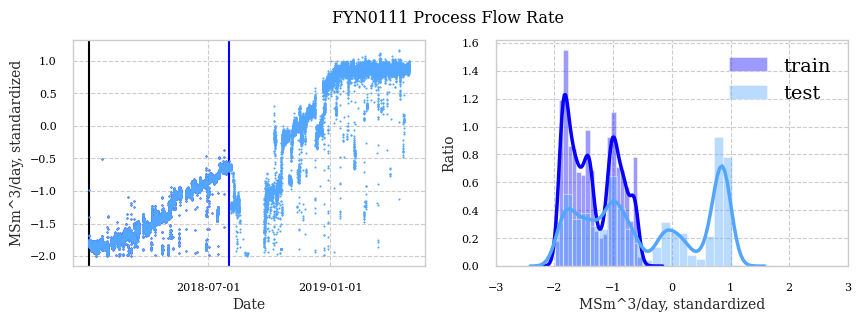

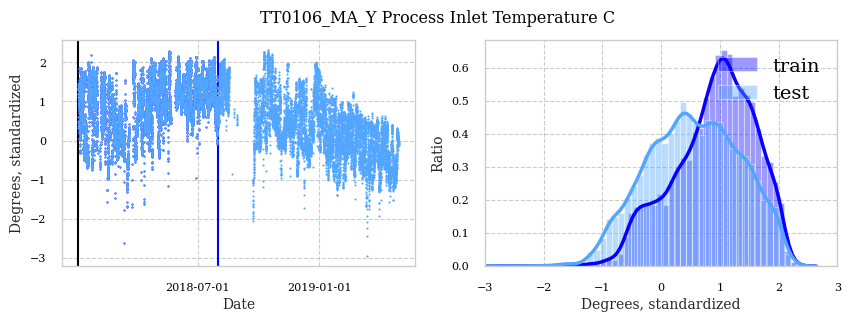

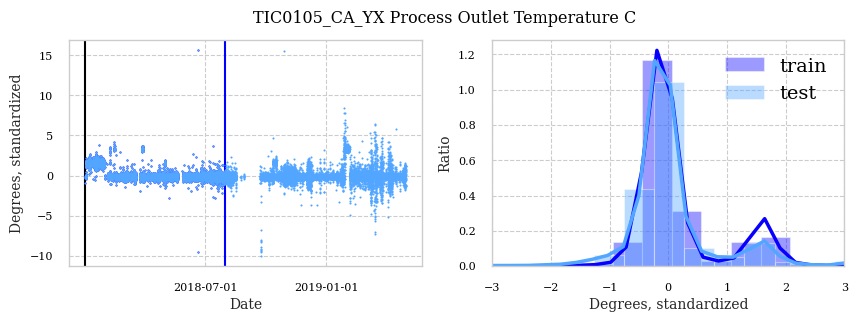

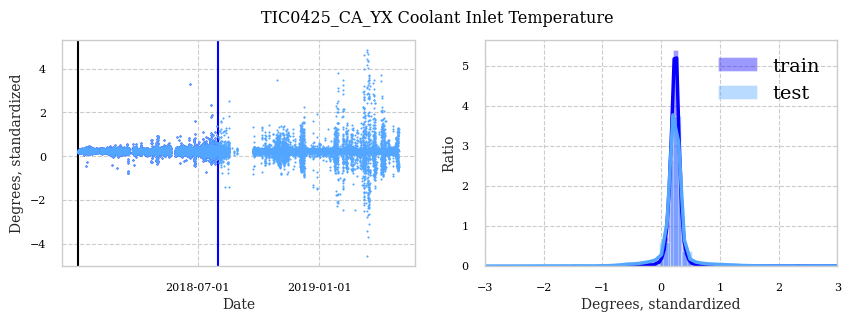

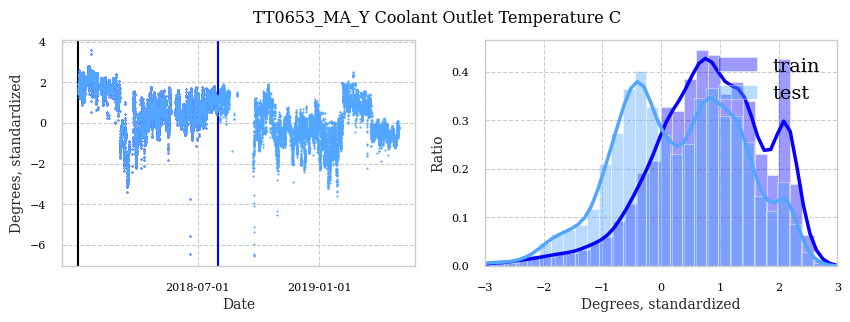

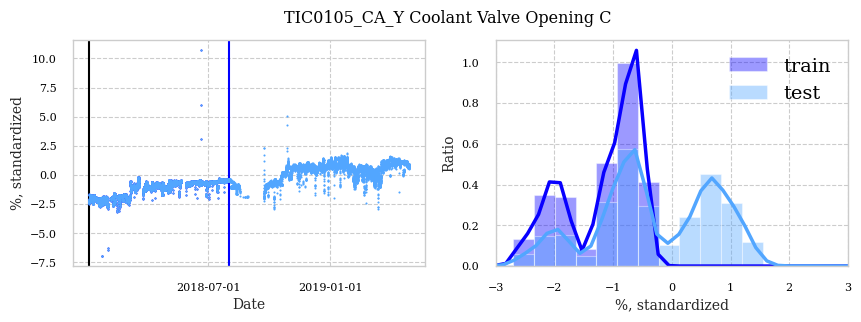

In [3]:
valueDistribution(df, traintime, testtime, columnDescriptions, columnUnits)

# Profiling
Pandas profiling offers detailed information about the provided dataset. Metrics such as missing cells, memory size, column uniqueness and column correlation can be seen.

In [4]:
report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report.to_file(output_file="profiling/dataset_profiling_F.html")
report

In short, the profiling tool tells us that:
- There are no missing cells or duplicate rows in the dataset, indicating it can be used for machine learning algorithms
- The Process Flow Rate is very unlike a gaussian distribution
- Process Outlet Temperature is rather consistent around the mean with a small variance, indicating the gas is cooled as intented